Data Link: https://www.kaggle.com/datasets/sshikamaru/fruit-recognition

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
import os 
import matplotlib.image as mpimg
import random
from pathlib import Path

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import load_img, img_to_array
import pathlib
import PIL

In [2]:
#pip install opencv-python opencv-python-headless

In [3]:
import cv2

In [4]:
for dirpath, dirnames, filenames in os.walk(r"C:\Users\HP\Fruits"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 3 images in 'C:\Users\HP\Fruits'.
There are 0 directories and 1 images in 'C:\Users\HP\Fruits\.ipynb_checkpoints'.
There are 1 directories and 0 images in 'C:\Users\HP\Fruits\test'.
There are 0 directories and 5641 images in 'C:\Users\HP\Fruits\test\test'.
There are 1 directories and 0 images in 'C:\Users\HP\Fruits\train'.
There are 33 directories and 0 images in 'C:\Users\HP\Fruits\train\train'.
There are 0 directories and 492 images in 'C:\Users\HP\Fruits\train\train\Apple Braeburn'.
There are 0 directories and 492 images in 'C:\Users\HP\Fruits\train\train\Apple Granny Smith'.
There are 0 directories and 492 images in 'C:\Users\HP\Fruits\train\train\Apricot'.
There are 0 directories and 427 images in 'C:\Users\HP\Fruits\train\train\Avocado'.
There are 0 directories and 490 images in 'C:\Users\HP\Fruits\train\train\Banana'.
There are 0 directories and 462 images in 'C:\Users\HP\Fruits\train\train\Blueberry'.
There are 0 directories and 490 images in 'C:\Use

In [5]:
train_path = r"C:\Users\HP\Fruits\train\train"
test_path = r"C:\Users\HP\Fruits\test\test"

In [6]:
# Function to count the number of images in a directory
def count_images_in_directory(directory):
    total_images = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):  # Adjust file extensions as needed
                total_images += 1
    return total_images

# Count the number of images in the train and test directories
train_image_count = count_images_in_directory(train_path)
test_image_count = count_images_in_directory(test_path)

print("Number of images in train directory:", train_image_count)
print("Number of images in test directory:", test_image_count)

Number of images in train directory: 16854
Number of images in test directory: 5641


In [7]:
data_dir = pathlib.Path(train_path) 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['Apple Braeburn' 'Apple Granny Smith' 'Apricot' 'Avocado' 'Banana'
 'Blueberry' 'Cactus fruit' 'Cantaloupe' 'Cherry' 'Clementine' 'Corn'
 'Cucumber Ripe' 'Grape Blue' 'Kiwi' 'Lemon' 'Limes' 'Mango' 'Onion White'
 'Orange' 'Papaya' 'Passion Fruit' 'Peach' 'Pear' 'Pepper Green'
 'Pepper Red' 'Pineapple' 'Plum' 'Pomegranate' 'Potato Red' 'Raspberry'
 'Strawberry' 'Tomato' 'Watermelon']


Apple Braeburn Class Statistics:
Mean: 115.56606510840109
Standard Deviation: 95.94185831675024
Pixel Value Range: (0, 255)

Apple Granny Smith Class Statistics:
Mean: 152.61513096205962
Standard Deviation: 81.58010398707393
Pixel Value Range: (0, 255)

Apricot Class Statistics:
Mean: 132.9346388211382
Standard Deviation: 93.57224747051464
Pixel Value Range: (0, 255)

Avocado Class Statistics:
Mean: 126.58396448087431
Standard Deviation: 107.80560490291191
Pixel Value Range: (0, 255)

Banana Class Statistics:
Mean: 206.4348293197279
Standard Deviation: 75.65767733586092
Pixel Value Range: (0, 255)

Blueberry Class Statistics:
Mean: 118.26750057720058
Standard Deviation: 104.01863874011215
Pixel Value Range: (0, 255)

Cactus fruit Class Statistics:
Mean: 191.25434482993197
Standard Deviation: 77.75337793961371
Pixel Value Range: (0, 255)

Cantaloupe Class Statistics:
Mean: 198.6626695799458
Standard Deviation: 66.0022710621061
Pixel Value Range: (0, 255)

Cherry Class Statistics:
Mean: 

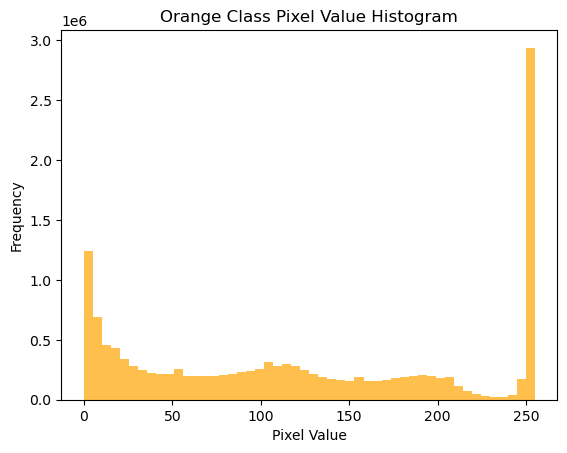

In [8]:
from PIL import Image
import os

# Function to calculate image statistics for a specific class
def calculate_class_image_statistics(class_path):
    pixel_values = []
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        if os.path.isfile(img_path):  # Ensure it's a file
            img = Image.open(img_path)
            img_array = np.array(img)
            pixel_values.extend(img_array.flatten())
    pixel_values = np.array(pixel_values)
    mean = np.mean(pixel_values)
    std_dev = np.std(pixel_values)
    pixel_range = (np.min(pixel_values), np.max(pixel_values))
    return mean, std_dev, pixel_range

# Get all class directories in the train path
class_directories = [os.path.join(train_path, class_name) for class_name in os.listdir(train_path)]

# Calculate statistics for each class
for class_dir in class_directories:
    class_name = os.path.basename(class_dir)
    class_mean, class_std_dev, class_range = calculate_class_image_statistics(class_dir)
    print(f"{class_name} Class Statistics:")
    print("Mean:", class_mean)
    print("Standard Deviation:", class_std_dev)
    print("Pixel Value Range:", class_range)
    print()

# Visualize histogram of pixel values for one class (assuming "Orange" class)
orange_class_path = os.path.join(train_path, "Orange")
orange_image_paths = [os.path.join(orange_class_path, img_name) for img_name in os.listdir(orange_class_path)]
pixel_values = []
for img_path in orange_image_paths:
    img = Image.open(img_path)
    img_array = np.array(img)
    pixel_values.extend(img_array.flatten())
plt.hist(pixel_values, bins=50, color='orange', alpha=0.7)
plt.title('Orange Class Pixel Value Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

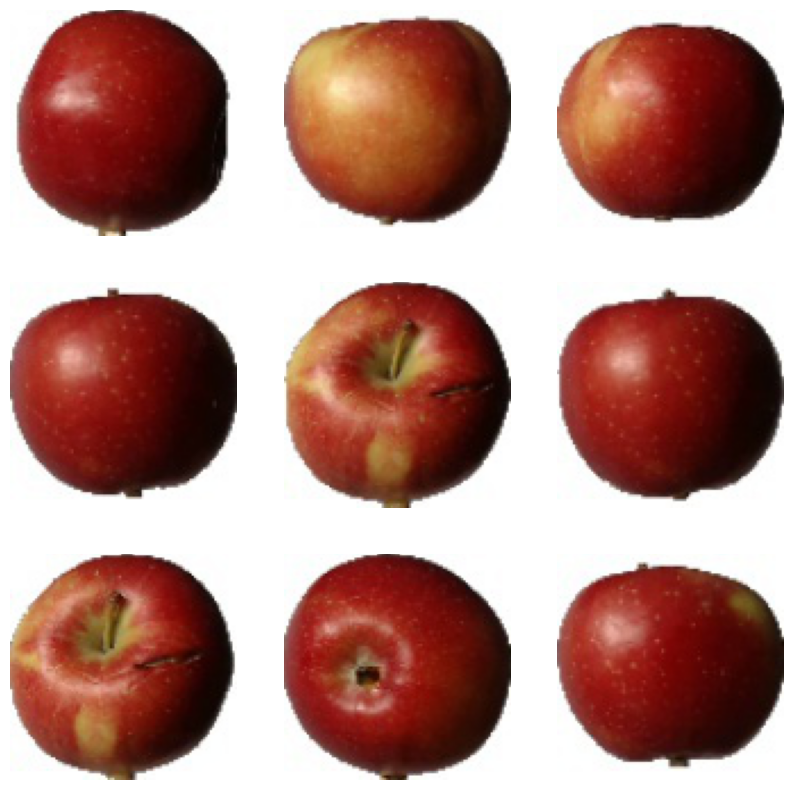

In [9]:
fruits = list(data_dir.glob('Apple Braeburn/*.jpg'))

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = PIL.Image.open(str(fruits[i]))
    plt.imshow(img)
    plt.axis('off')

plt.show()

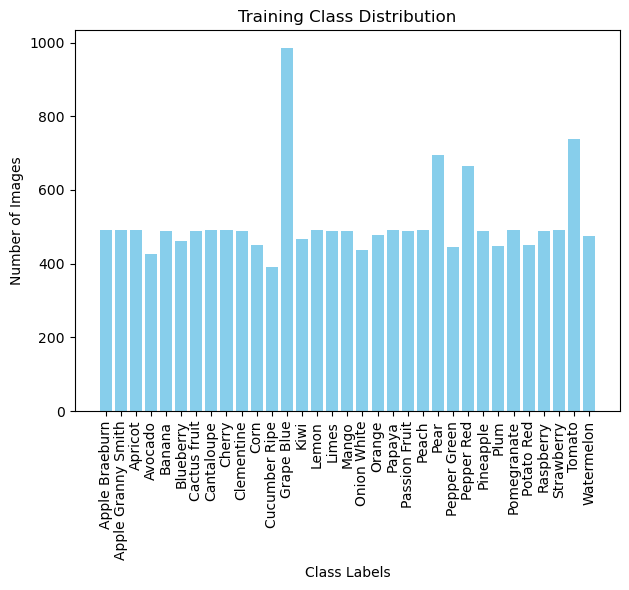

In [10]:
import matplotlib.pyplot as plt
import pathlib
import os

# Define the paths to the train and test directories

train_path = r"C:\Users\HP\Fruits\train\train"
test_path = r"C:\Users\HP\Fruits\test\test"

# Function to count the number of images in each class
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count the number of images per class in the training and testing directories
train_class_counts = count_images_per_class(train_path)
test_image_count = sum(count_images_per_class(test_path).values())

# Create bar plots for both training and testing class distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(train_class_counts.keys(), train_class_counts.values(), color='skyblue')
plt.title('Training Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically


plt.tight_layout()
plt.show()

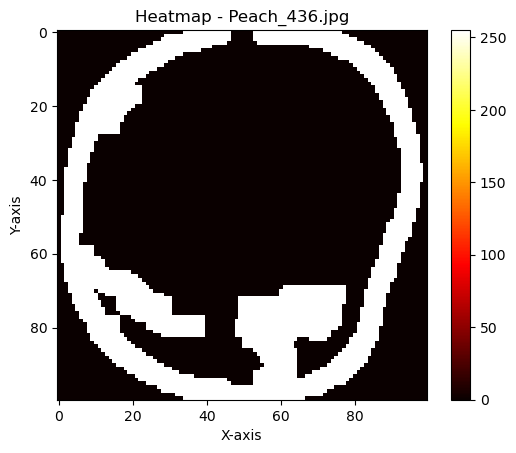

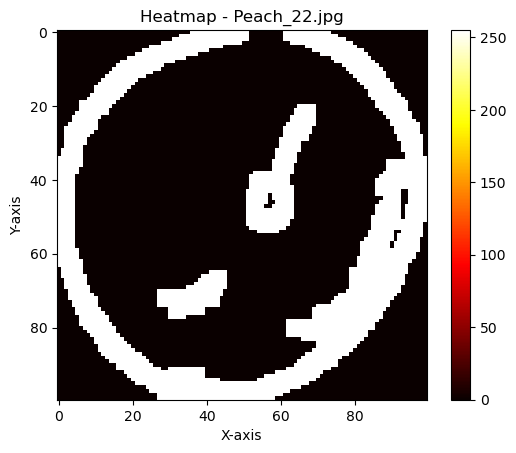

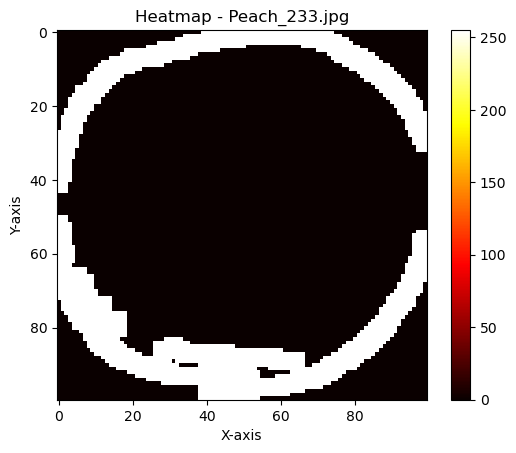

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pathlib

# Function to generate a heatmap based on edge detection
def generate_heatmap(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150)
    
    # Dilate the edges to emphasize them
    kernel = np.ones((5,5), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)
    
    # Convert the dilated edges to a heatmap
    heatmap = dilated_edges.astype(float)
    
    return heatmap

# Define your data directory path
data_dir = pathlib.Path(r"C:\Users\HP\Fruits\train\train")

# Select 3 random image paths from the Peach class directory
selected_image_paths = np.random.choice(list(data_dir.glob("Peach/*.jpg")), 3, replace=False)

# Iterate over the selected image paths
for image_path in selected_image_paths:
    # Load an image
    image = cv2.imread(str(image_path))

    # Generate a heatmap for the image
    heatmap = generate_heatmap(image)

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the heatmap
    heatmap_plot = ax.imshow(heatmap, cmap='hot')

    # Add a colorbar
    cbar = fig.colorbar(heatmap_plot)

    # Set the title and labels
    ax.set_title('Heatmap - {}'.format(image_path.name))
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

    # Show the plot
    plt.show()

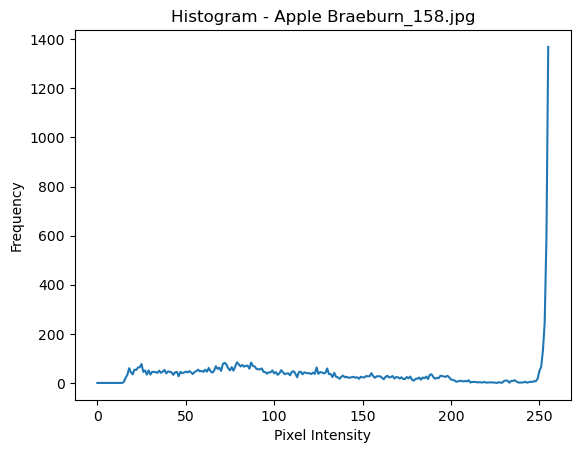

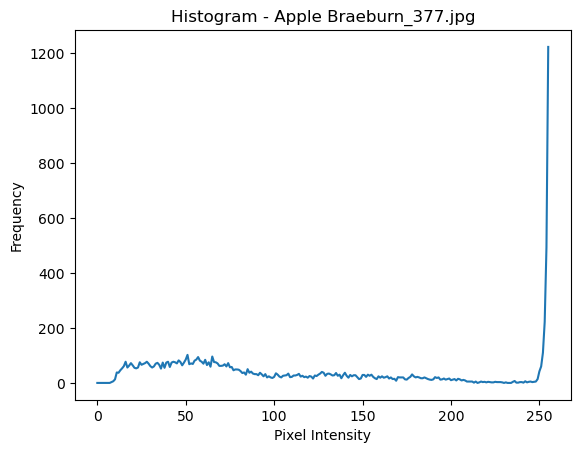

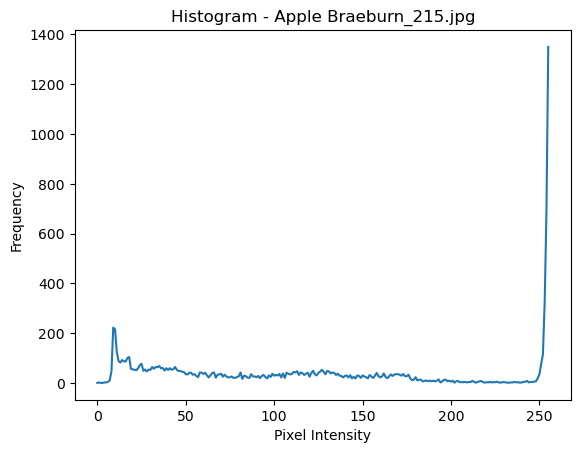

In [12]:
# Select 3 random image paths from the directory
selected_image_paths = np.random.choice(list(data_dir.glob("Apple Braeburn/*.jpg")), 3, replace=False)

# Iterate over the selected image paths
for image_path in selected_image_paths:
    # Load an image
    image = cv2.imread(str(image_path))

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate histogram
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    # Plot histogram
    plt.figure()
    plt.title('Histogram - {}'.format(image_path.name))
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.plot(hist)
    plt.show()

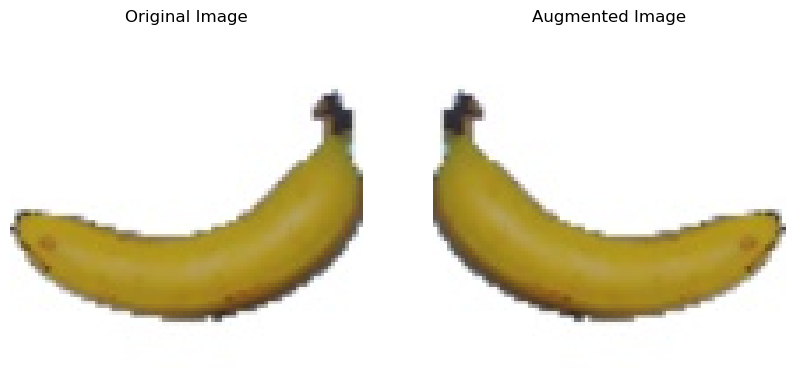

In [13]:
import cv2
import matplotlib.pyplot as plt
import os

# Function to apply data augmentation to an image
def augment_image(image):
    # Apply data augmentation techniques
    # Example: flip horizontally
    augmented_image = cv2.flip(image, 1)  # 1 for horizontal flip, 0 for vertical flip
    
    return augmented_image

# Define paths to original images
original_image_dir = r"C:\Users\HP\Fruits\train\train\Banana"
# Choose one of the original images for augmentation
image_name = os.listdir(original_image_dir)[0]
original_image_path = os.path.join(original_image_dir, image_name)

# Load the original image
original_image = cv2.imread(original_image_path)

# Apply data augmentation
augmented_image = augment_image(original_image)

# Plot the original and augmented images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Augmented Image')
axes[1].axis('off')
plt.show()

In [14]:
import os
import cv2

# Define the paths to the train and test directories
train_path = r"C:\Users\HP\Fruits\train\train\\"
test_path = r"C:\Users\HP\Fruits\test\test\\"

# Function to get the dimensions of an image
def get_image_dimensions(image_path):
    image = cv2.imread(image_path)
    if image is not None:
        return image.shape  # Return height, width, and number of channels
    else:
        return None

# Function to get all unique image sizes in a directory
def get_unique_image_sizes(directory):
    unique_sizes = set()  # Set to store unique sizes
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):  # Adjust file extensions as needed
                image_path = os.path.join(root, file)
                dimensions = get_image_dimensions(image_path)
                if dimensions is not None:
                    unique_sizes.add(dimensions)
    return unique_sizes

# Get unique image sizes for both train and test directories
unique_train_sizes = get_unique_image_sizes(train_path)
unique_test_sizes = get_unique_image_sizes(test_path)

# Print unique sizes
print("Unique image sizes in train directory:")
for size in unique_train_sizes:
    print(size)

print("\nUnique image sizes in test directory:")
for size in unique_test_sizes:
    print(size)

Unique image sizes in train directory:
(100, 100, 3)

Unique image sizes in test directory:
(100, 100, 3)


In [15]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 100)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  return img

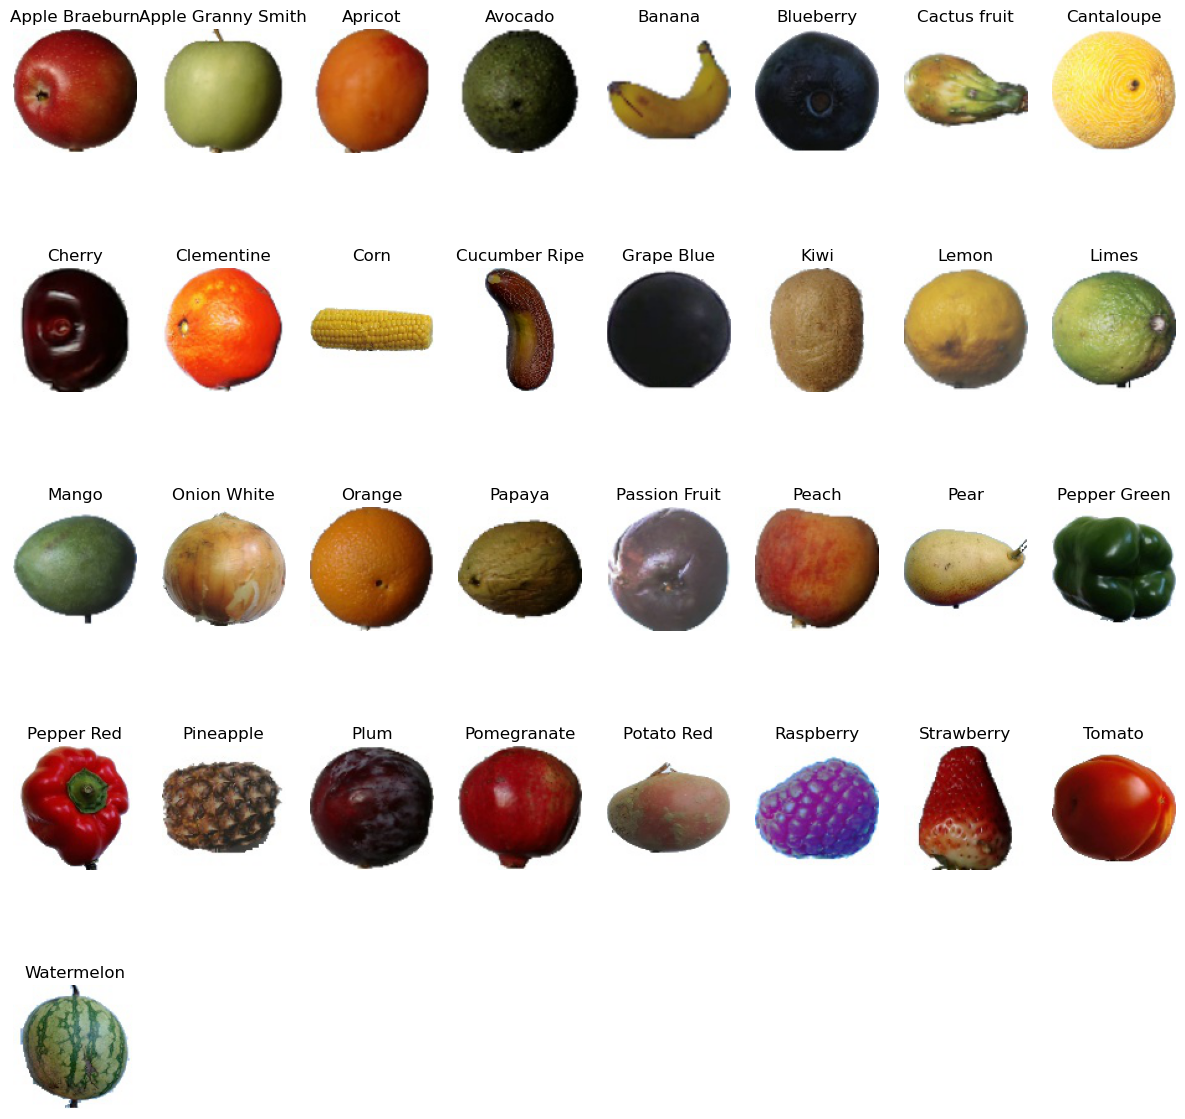

In [16]:
plt.figure(figsize = (15,15))
# View a random image from the training dataset for all classes
for i in range(33):
    plt.subplot(5,8,i+1)
    img = view_random_image(target_dir=train_path,
                        target_class=class_names[i])

In [17]:
train_val_data = {'path' : [],
       'filename': [],
       'label': []}
for dirpath, dirnames, filenames in os.walk(train_path):
    for f in filenames:
        train_val_data['path'].append(dirpath)
        train_val_data['filename'].append(f)
        train_val_data['label'].append(f.split('_')[0])

In [18]:
train_val_data_df = pd.DataFrame(train_val_data)
train_val_data_df.head()

,path,filename,label
0,C:\Users\HP\Fruits\train\train\\Apple Braeburn,Apple Braeburn_0.jpg,Apple Braeburn
1,C:\Users\HP\Fruits\train\train\\Apple Braeburn,Apple Braeburn_1.jpg,Apple Braeburn
2,C:\Users\HP\Fruits\train\train\\Apple Braeburn,Apple Braeburn_10.jpg,Apple Braeburn
3,C:\Users\HP\Fruits\train\train\\Apple Braeburn,Apple Braeburn_100.jpg,Apple Braeburn
4,C:\Users\HP\Fruits\train\train\\Apple Braeburn,Apple Braeburn_101.jpg,Apple Braeburn


In [19]:
#Read test data and create a dataframe
test_data = {'path' : [],
       'filename': []}
for dirpath, dirnames, filenames in os.walk(test_path):
    for f in filenames:
        test_data['path'].append(dirpath)
        test_data['filename'].append(f)

In [20]:
test_data_df = pd.DataFrame(test_data)
test_data_df.head()

,path,filename
0,C:\Users\HP\Fruits\test\test\\,0000.jpg
1,C:\Users\HP\Fruits\test\test\\,0001.jpg
2,C:\Users\HP\Fruits\test\test\\,0002.jpg
3,C:\Users\HP\Fruits\test\test\\,0003.jpg
4,C:\Users\HP\Fruits\test\test\\,0004.jpg


In [21]:
images = []
label = [] 

for _, d in train_val_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    images.append(img_to_array(img))
    label.append(d['label'])

In [22]:
images = np.array(images)
labels = np.array(label)
print(f"Complete data images shape: {images.shape} and label shape: {labels.shape}")

Complete data images shape: (16854, 100, 100, 3) and label shape: (16854,)


In [23]:
test_images = []

for _, d in test_data_df.iterrows():
    img = load_img(os.path.join(d['path'],d['filename']))
    test_images.append(img_to_array(img))
    
test_images = np.array(test_images)
print(f"Test images shape: {test_images.shape} ")

Test images shape: (5641, 100, 100, 3) 


In [24]:
class_indices = dict(zip(class_names, range(len(class_names))))

labels_encoded = list(map(class_indices.get, labels))

#Convert to categorical data using tensorflow 
#labels to One-hot encoded
label_categorical = tf.keras.utils.to_categorical(labels_encoded, num_classes=len(class_names))#, dtype='uint8')

In [25]:
train_im, valid_im, train_lab, valid_lab = train_test_split(images, label_categorical, test_size=0.20, 
                                                            stratify=label_categorical, 
                                                            random_state=40, shuffle = True)

In [26]:
print ("train data shape after the split: ", train_im.shape)
print ('new validation data shape: ', valid_im.shape)
print ("validation labels shape: ", valid_lab.shape)

train data shape after the split:  (13483, 100, 100, 3)
new validation data shape:  (3371, 100, 100, 3)
validation labels shape:  (3371, 33)


In [27]:
print ('train im and label types: ', type(train_im), type(train_lab))

training_data = tf.data.Dataset.from_tensor_slices((train_im, train_lab))
validation_data = tf.data.Dataset.from_tensor_slices((valid_im, valid_lab))
test_data = tf.data.Dataset.from_tensor_slices(test_images)

print ('check types; ', type(training_data), type(validation_data), type(test_data))

train im and label types:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>
check types;  <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


In [28]:
### check using element_spec

print (training_data.element_spec)
print (validation_data.element_spec)

### as expected, tensors of image and original label shape


### create an iterator and turn it into numpy array 
train_iter = iter(training_data)
print(next(train_iter)[0].numpy(), '\n', next(train_iter)[1].numpy(), np.argmax(next(train_iter)[1].numpy()))

(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.float32, name=None))
(TensorSpec(shape=(100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(33,), dtype=tf.float32, name=None))
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]] 
 [0. 0. 0. 0. 0. 0. 0. 0. 0

In [29]:
train_iter_im, train_iter_label = next(iter(training_data))
print (train_iter_im.numpy().shape, train_iter_label.numpy().shape)

(100, 100, 3) (33,)


In [30]:
train_iter_im1, train_iter_label1 = next(training_data.as_numpy_iterator())
print (train_iter_im1.shape, train_iter_label1.shape)

(100, 100, 3) (33,)


In [31]:
check_list = list(training_data.as_numpy_iterator())
print (len(check_list), check_list[1])

13483 (array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[251., 255., 252.],
        [254., 254., 254.],
        [255., 254., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [

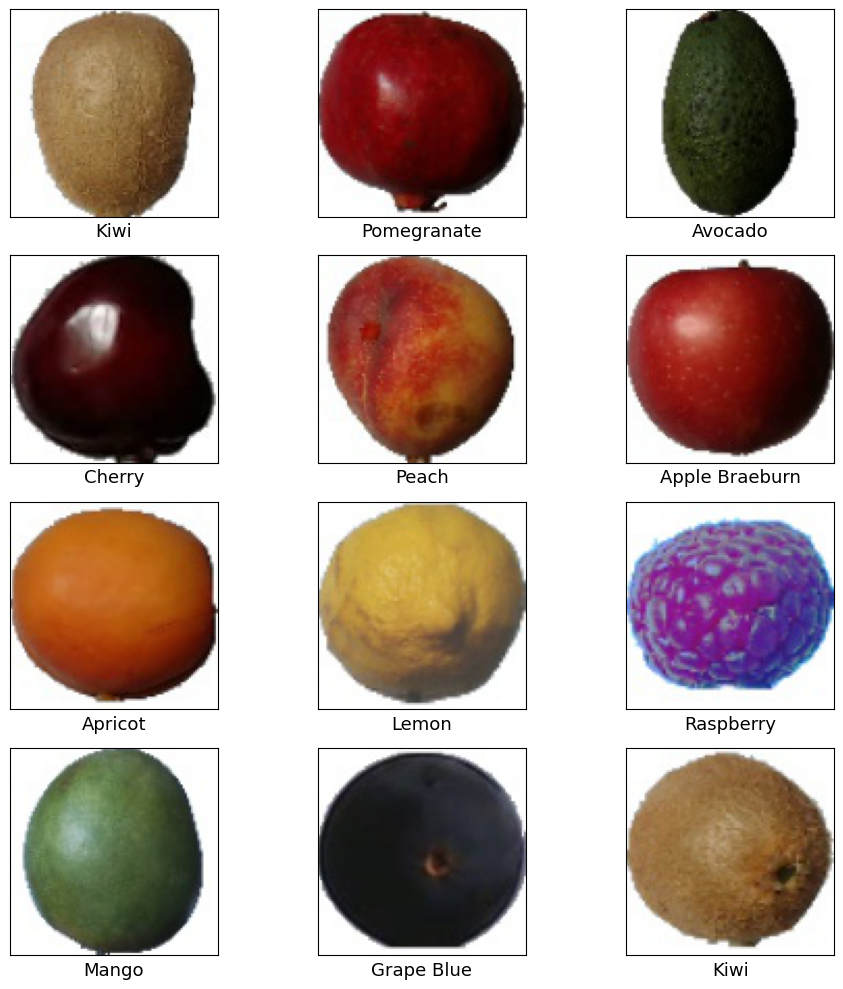

In [32]:
fig = plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(check_list[i][0]/255.)
    plt.xlabel(class_names[np.argmax(check_list[i][1])], fontsize=13)
plt.tight_layout()    
plt.show()

In [33]:
tf.__version__

'2.13.1'

In [34]:
#pip install tensorflow==2.13.1

In [35]:
rescale_data = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1/255.)
])

data_augmenation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode = "horizontal"),
    #layers.experimental.preprocessing.RandomRotation(0.1)
])

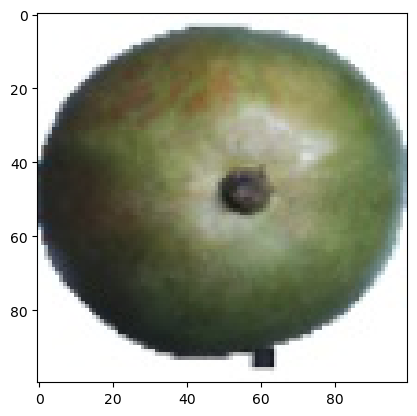

In [36]:
random_image_index = random.randint(0,len(train_im))
img = rescale_data(train_im[random_image_index])
img = data_augmenation(img)
plt.imshow(img)

In [37]:
BATCH_SIZE = 128 
AUTOTUNE = tf.data.AUTOTUNE 

def prepare(ds, shuffle=False, augment = False, test = False):
    if test:
        ds = ds.map(lambda x: (rescale_data(x)), num_parallel_calls=AUTOTUNE)
    else:
        ds = ds.map(lambda x, y: (rescale_data(x), y), num_parallel_calls=AUTOTUNE)
    
    if shuffle:
        ds = ds.shuffle(1000)
    
    #batch the data 
    ds = ds.batch(BATCH_SIZE)
    
    # Use data augmentation only on the training set.
    if augment:
        ds = ds.map(lambda x, y: (data_augmenation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)
    
    # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)

In [38]:
train_ds = prepare(training_data, shuffle = True, augment = True)
val_ds = prepare(validation_data)
test_ds = prepare(test_data, test=True)

In [39]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=5, 
                          kernel_size = 3,
                          activation = "relu",
                          input_shape = (100,100,3)),
    tf.keras.layers.MaxPool2D(pool_size =2,
                             padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

model_1.compile(loss="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [40]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 5)         140       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 5)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12005)             0         
                                                                 
 dense (Dense)               (None, 33)                396198    
                                                                 
Total params: 396338 (1.51 MB)
Trainable params: 396338 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
#Fit the model on training data 
history_1 = model_1.fit(train_ds,
                       epochs =25,
                       validation_data= val_ds)

Epoch 1/25
106/106 [==============================] - 45s 410ms/step - loss: 1.3331 - accuracy: 0.6774 - val_loss: 0.3649 - val_accuracy: 0.9166
Epoch 2/25
106/106 [==============================] - 43s 407ms/step - loss: 0.1885 - accuracy: 0.9602 - val_loss: 0.1044 - val_accuracy: 0.9778
Epoch 3/25
106/106 [==============================] - 43s 408ms/step - loss: 0.0586 - accuracy: 0.9895 - val_loss: 0.0339 - val_accuracy: 0.9935
Epoch 4/25
106/106 [==============================] - 43s 403ms/step - loss: 0.0228 - accuracy: 0.9969 - val_loss: 0.0250 - val_accuracy: 0.9950
Epoch 5/25
106/106 [==============================] - 43s 400ms/step - loss: 0.0119 - accuracy: 0.9986 - val_loss: 0.0107 - val_accuracy: 0.9982
Epoch 6/25
106/106 [==============================] - 43s 399ms/step - loss: 0.0064 - accuracy: 0.9999 - val_loss: 0.0070 - val_accuracy: 0.9991
Epoch 7/25
106/106 [==============================] - 44s 417ms/step - loss: 0.0049 - accuracy: 0.9998 - val_loss: 0.0062 - val_ac

<Axes: >

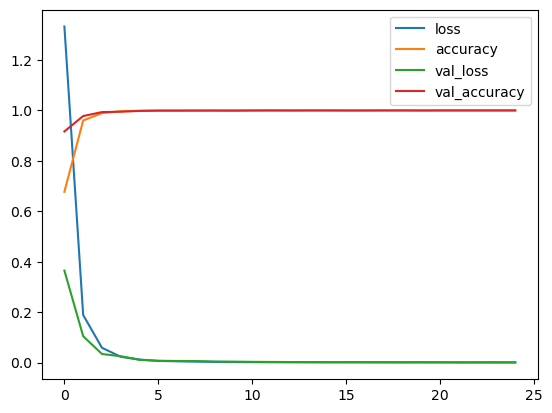

In [42]:
#loss and accuracy plot 
pd.DataFrame(history_1.history).plot()

In [43]:
model_1.save('model.h5')

C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
loaded_model = tf.keras.models.load_model(r'C:\Users\HP\Fruits\model.h5')

In [46]:
def preprocess_images(path):
    img = image.load_img(path, target_size=(224, 224))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0
    
    return img_preprocessed